# T1 error

This notebook visualize the T1 error in quantum computing using qiskit.

## T1 (Decoherence time)

T1 represents the timescale over which the quantum state of a qubit loses its coherence and collapses towards its ground state. This decoherence can be caused by interactions with the environment or other external factors. The longer the T1 time, the more stable the qubit is, allowing for longer quantum computations before errors become significant.

## T2 (Dephasing time)

T2 characterizes how long the quantum phase information of the qubit is preserved before it becomes uncertain due to interactions with the environment or noise. T2 is typically shorter than T1 because it measures how fast the quantum state loses phase coherence while still retaining its energy information.

## Visualize T1 in qiskit

A fake IBM quanutm backend FakeManilaV2 will be used. This backend is consistent with the one used in IBM quantum summer school 2023.

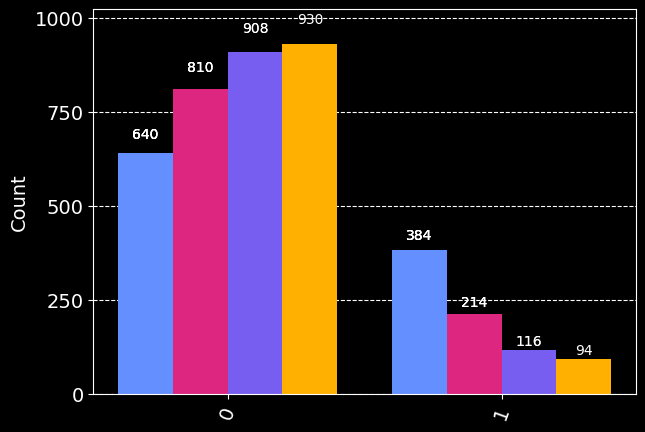

In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram, plot_coupling_map

backend = FakeManilaV2()

counts = []
for time in [0, 100, 200, 300]:
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.delay(time, 0, 'us')
    qc.measure_all()

    qc = transpile(qc, backend)
    result = backend.run(qc).result()
    counts.append(result.get_counts())
plot_histogram(counts)